## **Problema: Segmentar  a los clientes del Banco en al menos 3 categorías o grupos diferentes**
- ¿Cuál será el número de grupos distinguibles dentro de los clientes del banco?



# PASO 1: IMPORTAMOS LIBRERÍAS Y EL DATA SET: ANÁLISIS Y LIEMPIEZA DE DATOS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/joanby/ds4b/main/2.%20Marketing%20Department/Marketing_data.csv")

In [3]:
# --------------- Variables del Problema -----------------------#


# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [4]:
df.shape

(8950, 18)

In [5]:
df.sample(7)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
941,C10975,2072.457624,1.000000,17409.21,11263.17,6146.04,0.000000,1.000000,1.000000,1.000000,0.000000,0,175,19500.0,19517.161600,517.324081,0.333333,12
7909,C18123,405.194627,1.000000,0.00,0.00,0.00,293.097125,0.000000,0.000000,0.000000,0.083333,1,0,1500.0,1506.490213,242.466254,0.083333,12
3390,C13487,3765.693221,1.000000,0.00,0.00,0.00,1700.400179,0.000000,0.000000,0.000000,0.454545,8,0,4000.0,745.344919,2011.115424,0.000000,11
7075,C17267,0.000000,0.000000,0.00,0.00,0.00,147.241855,0.000000,0.000000,0.000000,0.090909,1,0,500.0,667.921811,NaN,0.000000,11
3599,C13701,286.264356,0.857143,27.51,27.51,0.00,871.199257,0.142857,0.142857,0.000000,0.428571,3,1,500.0,733.901545,122.835190,0.250000,7
3304,C13398,306.084815,0.888889,3200.00,0.00,3200.00,0.000000,0.888889,0.000000,0.777778,0.000000,0,14,2500.0,3017.573426,116.302492,0.200000,9
5363,C15515,923.977036,1.000000,0.00,0.00,0.00,6616.555691,0.000000,0.000000,0.000000,0.416667,6,0,2500.0,5155.088326,320.494371,0.200000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
 # Investigamos a un cliente OutLier
 df[df.ONEOFF_PURCHASES == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [9]:
# Cliente que más ha pedido prestado al banco
df[df.CASH_ADVANCE == df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [10]:
# Vemos si tenemos columnas con datos faltantes
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [11]:
# Vemos cuantos datos faltantes tenemos por categoría
df.isnull().sum() # tambien sirve .isna()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

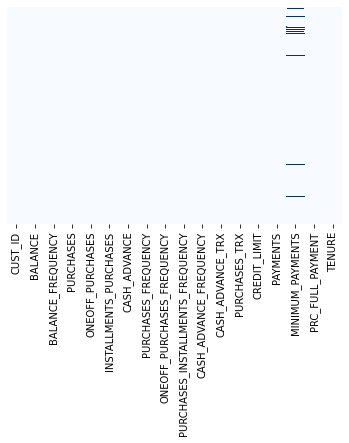

In [12]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")
plt.show()

In [13]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(), inplace=True)

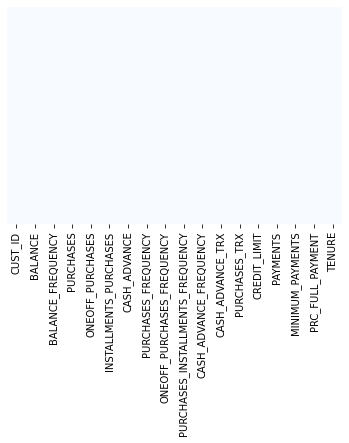

In [14]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")
plt.show()

In [15]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.drop(["CUST_ID"], inplace = True, axis = 1)

In [18]:
df.sample()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2188,250.060059,1.0,2405.97,2182.22,223.75,0.0,1.0,0.916667,0.416667,0.0,0,36,10000.0,2105.342196,188.130216,0.916667,12


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

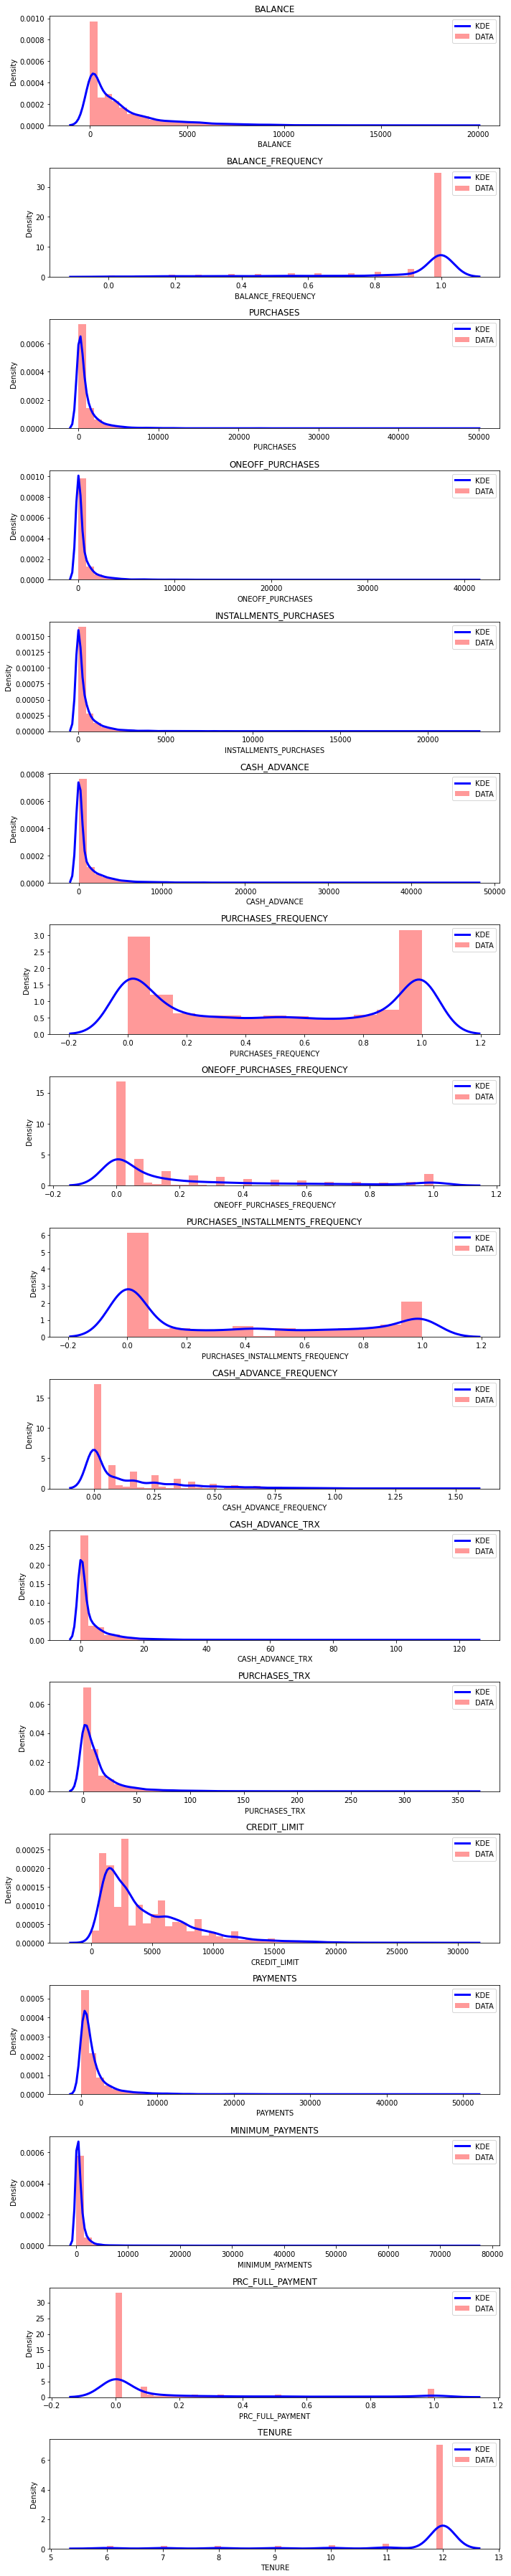

In [19]:
# Visualizamos las distribuciones de todas las variables
n_col = len(df.columns)

plt.figure(figsize=(10,50))

for i in range(n_col):
  plt.subplot(n_col,1,i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "r", "label": "DATA"})
  plt.title(df.columns[i])
  plt.legend()

plt.tight_layout()

In [20]:
corrs = df.corr()

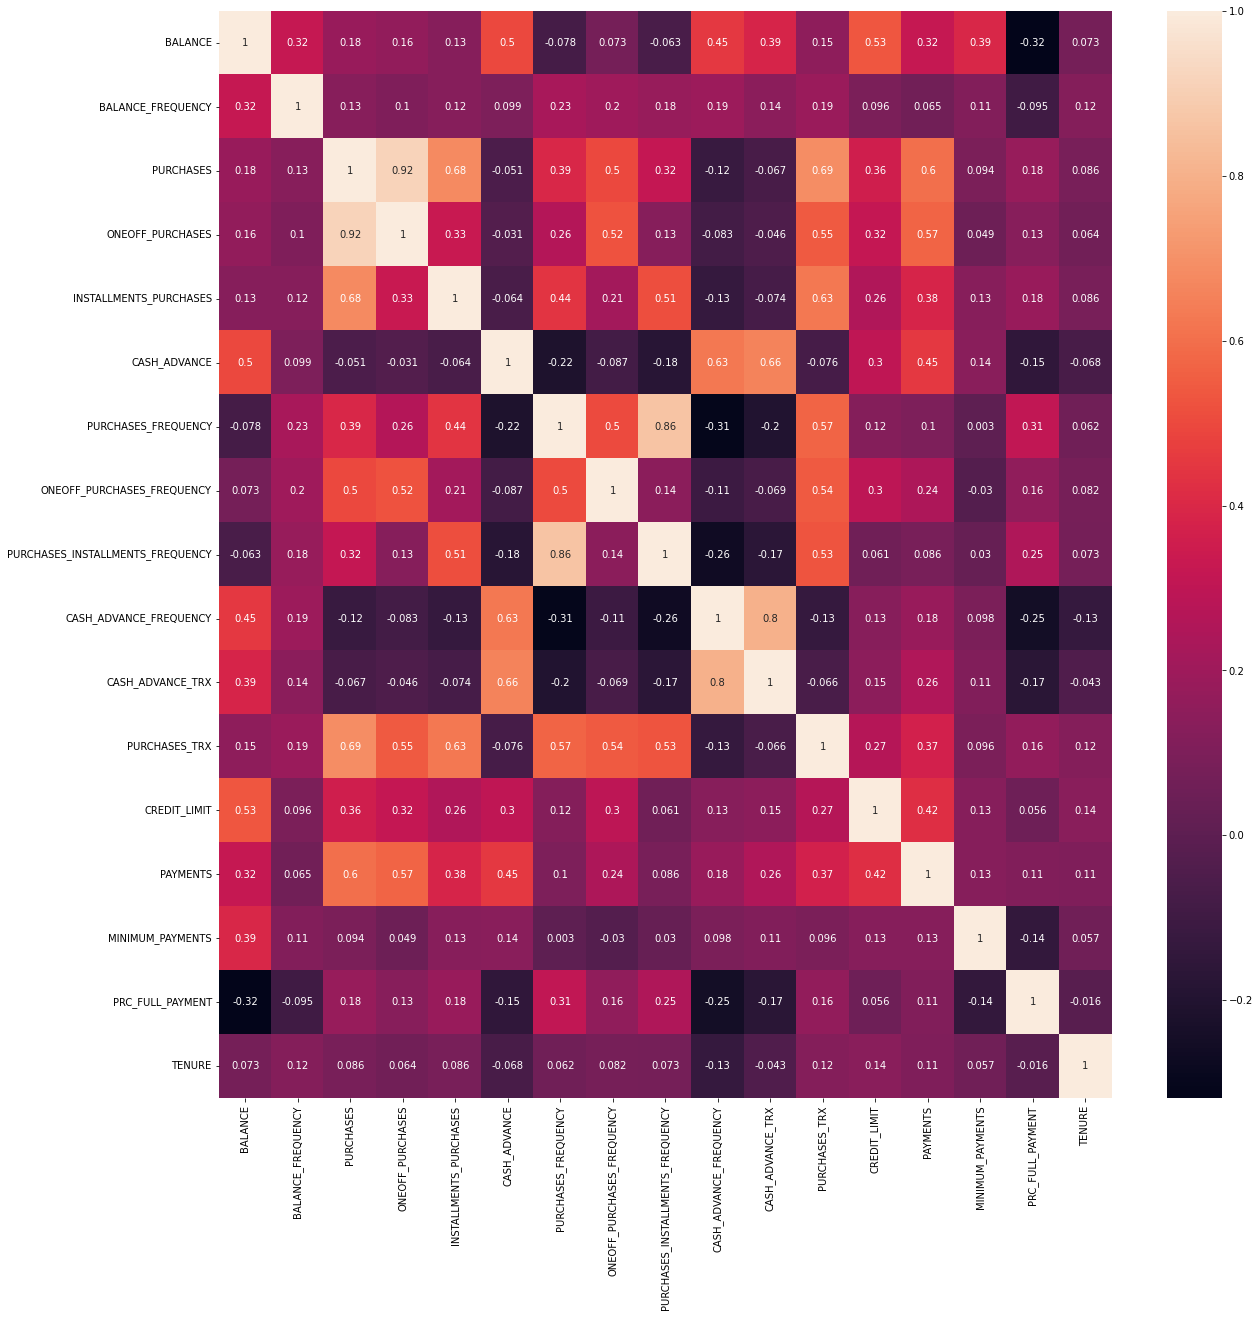

In [21]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corrs, annot=True)

In [22]:
# Sacamos el unico cliente del dataset que no tenía dato en CREDIT_LIMIT
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# PASO 2: ESCALADO DE DATOS Y MÉTODO DEL CODO

In [24]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [25]:
scaled_df.shape

(8949, 17)

In [26]:
scaled_df.max(), scaled_df.min() 

(32.41347957842009, -4.126918988092153)

In [27]:
scores = [] # lista de suma de cuadrados intra clusters
K = range(1, 20)
for k in K:
  km = KMeans(n_clusters=k)
  km.fit(scaled_df)
  scores.append(km.inertia_)

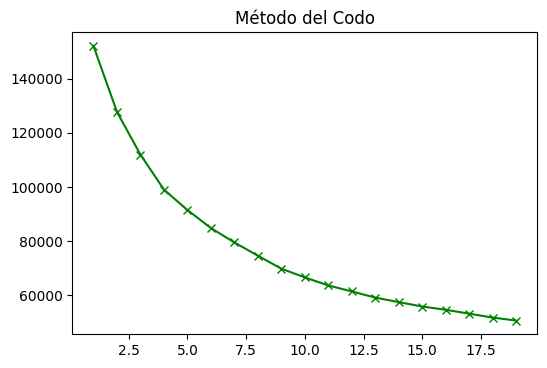

In [28]:
plt.figure(dpi = 100)
plt.plot(K, scores, "gx-")
plt.title("Método del Codo")
plt.show()

Con lo anterior podemos notar que el codo se forma entre los 6 y 10 clusters. Nos vamos a quedar con 8 clusters

In [29]:
kmeans = KMeans(8)
kmeans.fit(scaled_df)

KMeans()

In [30]:
labels = kmeans.labels_
labels

array([1, 2, 0, ..., 7, 7, 7], dtype=int32)

In [31]:
kmeans.cluster_centers_.shape

(8, 17)

In [32]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.162806,0.391905,0.463786,0.606354,-0.017520,-0.333523,0.942411,1.877177,0.088890,-0.408057,-0.323311,0.528541,0.383441,0.093721,-0.162207,0.407554,0.260865
1,0.020168,0.403606,-0.362276,-0.247443,-0.401885,-0.088152,-0.868660,-0.411227,-0.759519,0.114080,-0.021187,-0.487432,-0.305093,-0.249282,-0.003312,-0.457175,0.272212
2,1.692257,0.392448,-0.217450,-0.155878,-0.227849,2.031130,-0.476189,-0.211544,-0.413893,1.929272,1.944365,-0.266072,1.032938,0.829339,0.514033,-0.390165,0.069204
3,1.922919,0.337533,11.211501,10.599810,7.032756,0.419563,1.046876,1.915368,0.981222,-0.258880,0.061189,5.362178,3.043894,8.098616,1.120223,1.110028,0.310681
4,-0.366726,0.333336,-0.038863,-0.244330,0.356803,-0.363746,0.989288,-0.386859,1.204420,-0.475302,-0.361332,0.186283,-0.261313,-0.218284,-0.046229,0.314053,0.257356
5,-0.701302,-2.144131,-0.311190,-0.235746,-0.302580,-0.322054,-0.556422,-0.444066,-0.440232,-0.520929,-0.376205,-0.419816,-0.177675,-0.202345,-0.256732,0.281060,0.199054
6,0.919829,0.467529,2.254340,1.720992,2.168609,-0.193379,1.160463,1.554703,1.246227,-0.309432,-0.209825,2.781734,1.225172,1.283802,0.566114,0.288259,0.333894
7,-0.335469,-0.343295,-0.289016,-0.215768,-0.286603,0.068956,-0.201579,-0.288100,-0.223534,0.308907,0.001492,-0.387841,-0.568041,-0.392406,-0.208925,0.014821,-3.205581


In [33]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1225.772313,0.970147,1994.245839,1598.975721,395.270118,279.512186,0.868630,0.762495,0.399805,0.053480,1.042611,27.849501,5889.643946,2004.660395,486.267564,0.272939,11.866727
1,1606.625999,0.972918,229.274176,181.778135,47.678116,794.091358,0.141780,0.079800,0.062623,0.157970,3.104489,2.595291,3384.332843,1011.663099,856.582333,0.020011,11.881898
2,5087.025175,0.970276,538.711140,333.766209,205.063151,5238.537198,0.299293,0.139371,0.199985,0.521229,16.518605,8.097674,8252.912262,4134.278183,2062.292649,0.039611,11.610465
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,801.318763,0.956279,920.282203,186.945429,733.780089,216.131391,0.887443,0.087069,0.843150,0.040023,0.783127,19.341935,3543.632855,1101.401717,756.562513,0.245591,11.862035
5,104.910273,0.369652,338.424801,201.193870,137.482244,303.564554,0.267092,0.070003,0.189517,0.030892,0.681626,4.276037,3847.958886,1147.546130,265.970216,0.235940,11.784081
6,3479.242725,0.988054,5819.959145,3449.137221,2372.247102,573.415653,0.956142,0.666292,0.859765,0.073217,1.817102,83.857482,8952.375297,5449.952679,2183.670969,0.238046,11.964371
7,866.379288,0.796063,385.801981,234.354750,151.930322,1123.570918,0.409504,0.116532,0.275639,0.196960,3.259259,5.070853,2427.568438,597.319614,377.386475,0.158067,7.231884


In [34]:
df["CLUSTER"] = labels

In [35]:
df.sample()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
235,4014.388265,1.0,1189.52,1189.52,0.0,0.0,1.0,1.0,0.0,0.0,0,12,8000.0,0.0,864.206542,0.0,12,0


In [36]:
y_kmeans = kmeans.fit_predict(scaled_df)
y_kmeans

array([3, 4, 0, ..., 7, 7, 7], dtype=int32)

In [37]:
labels

array([1, 2, 0, ..., 7, 7, 7], dtype=int32)

In [38]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


# PASO 3: VISUALIZAMOS HISTOGRAMAS PARA CADA CLUSTER

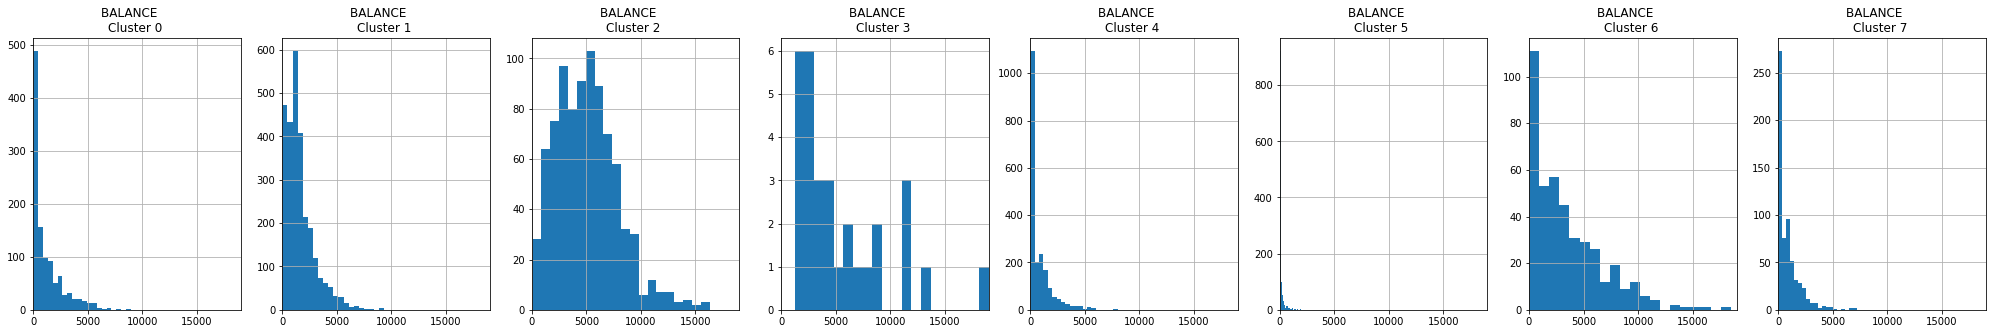

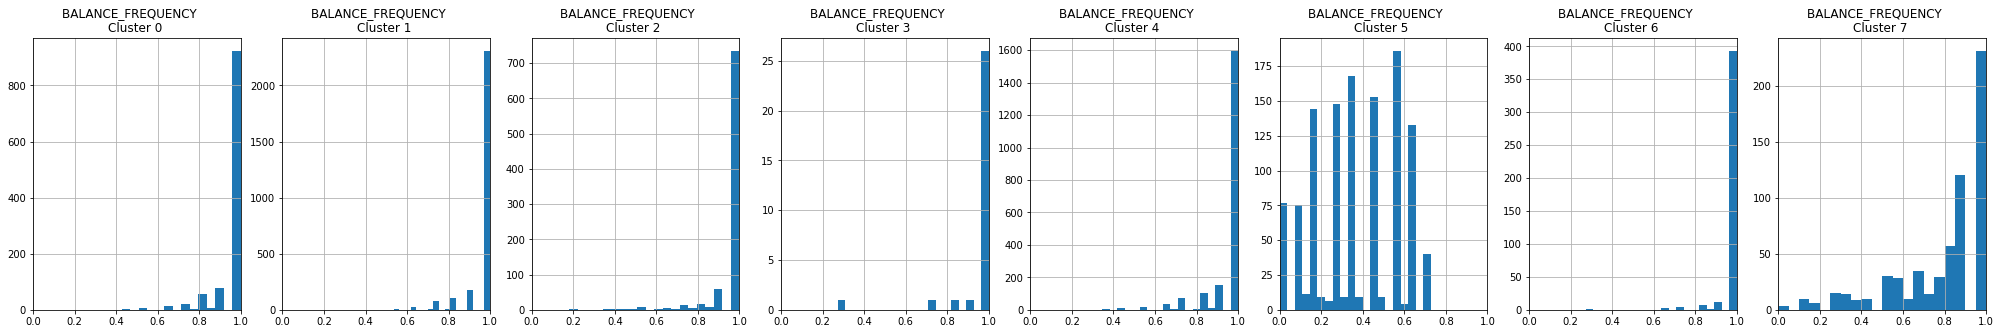

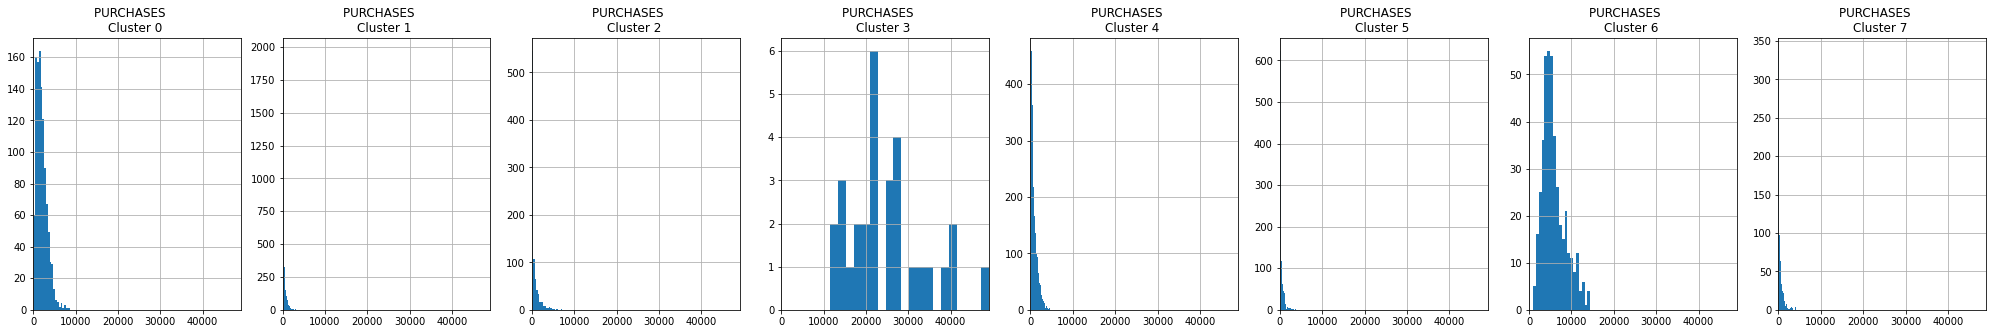

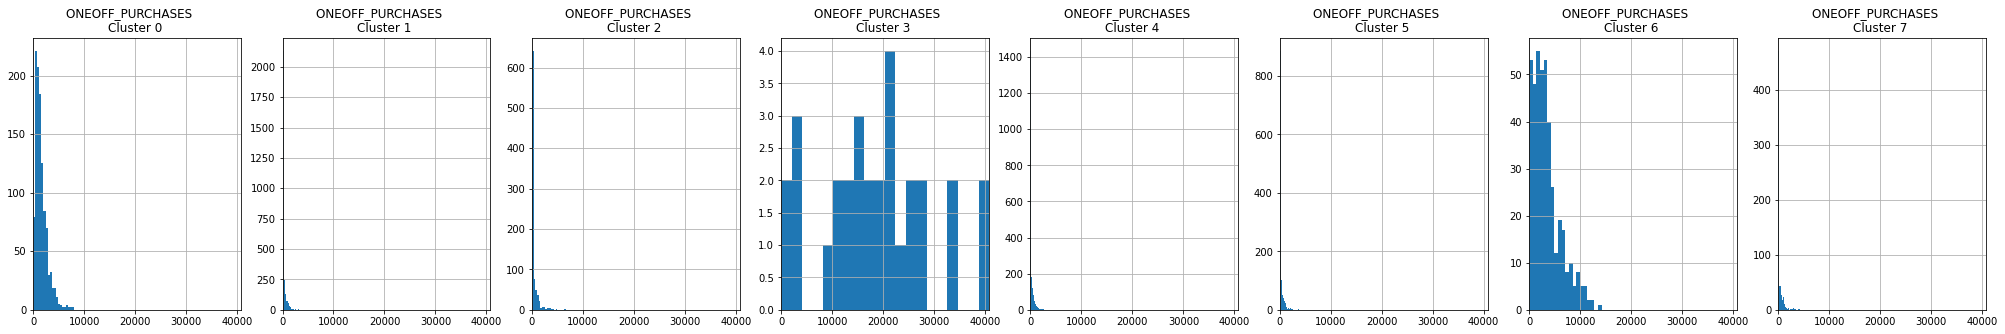

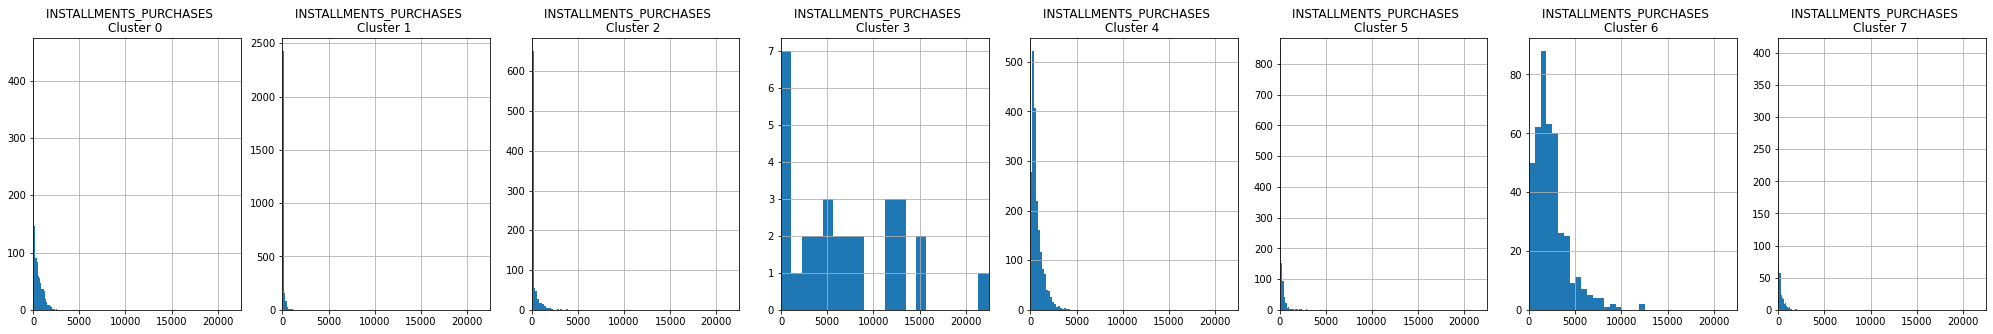

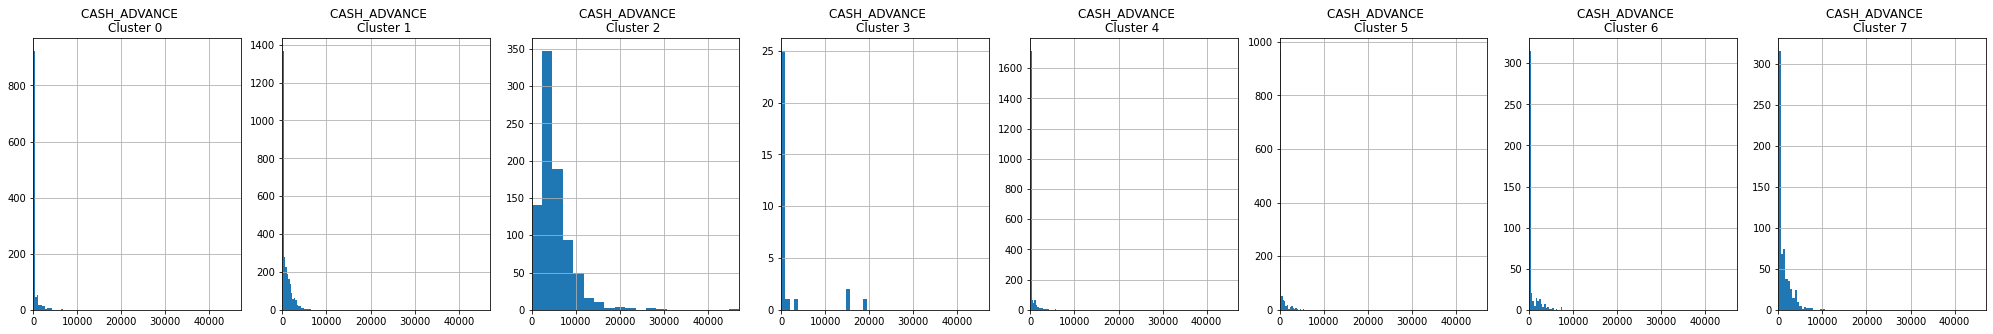

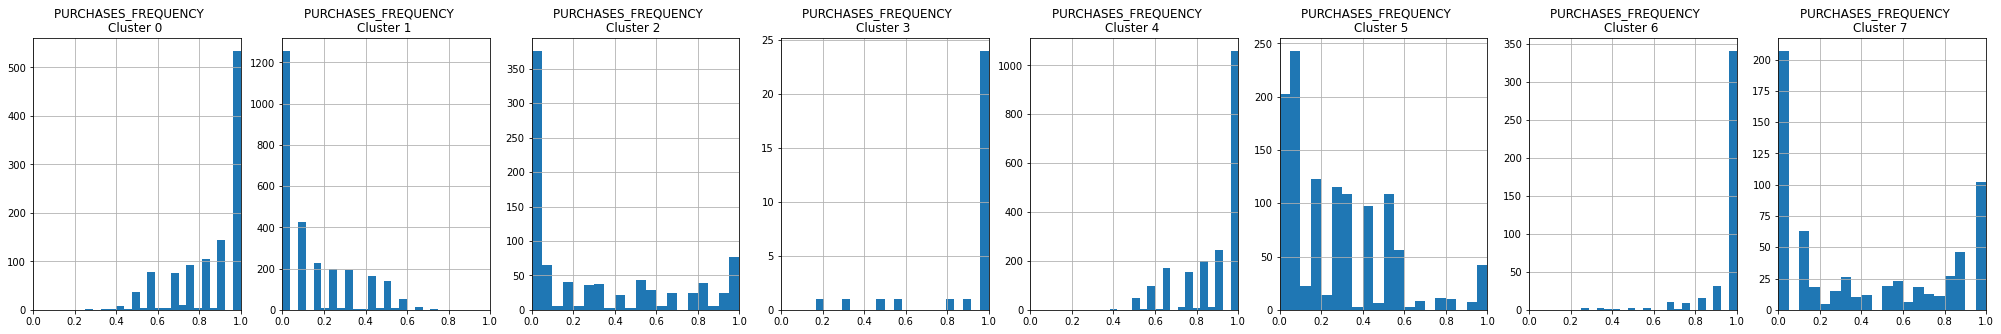

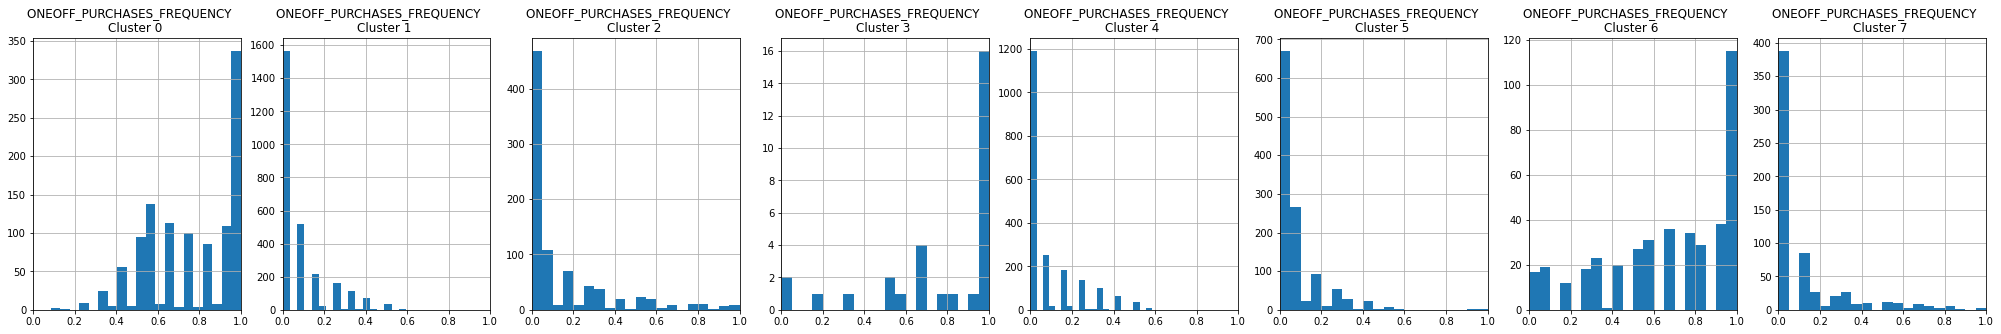

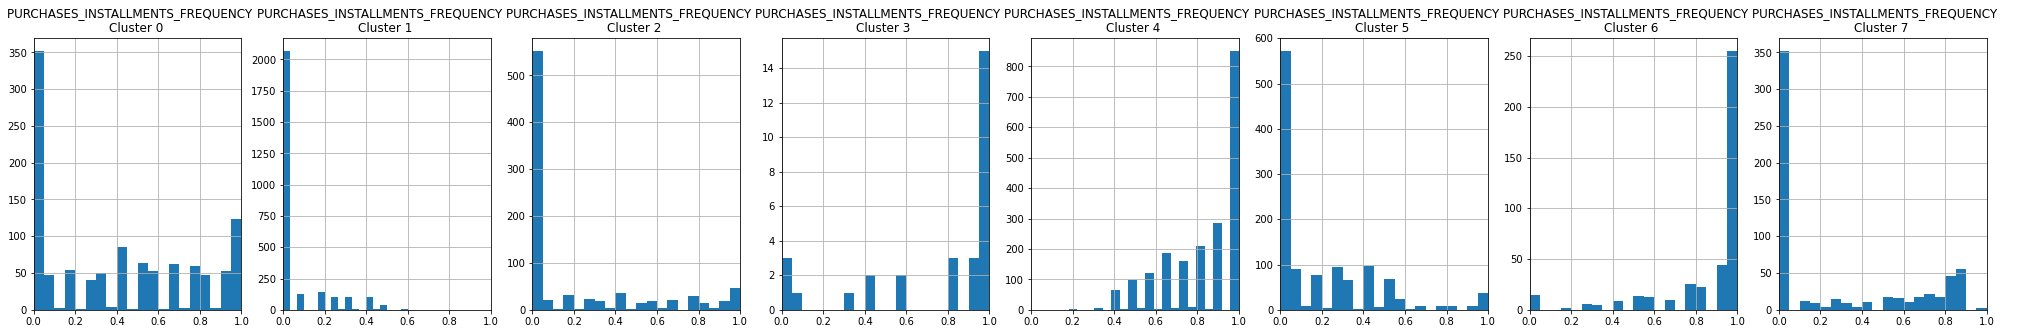

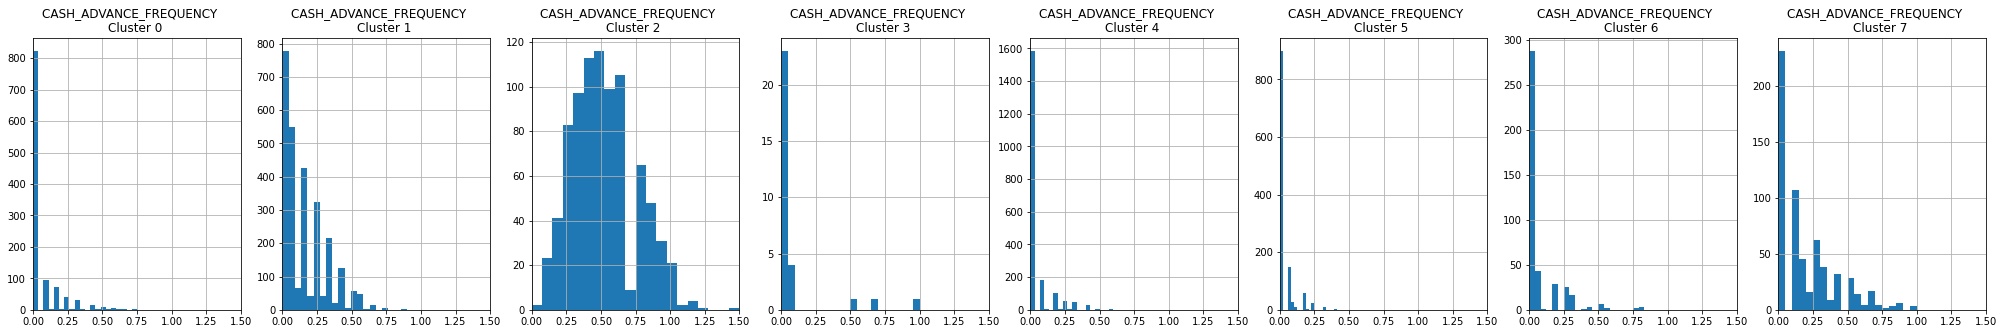

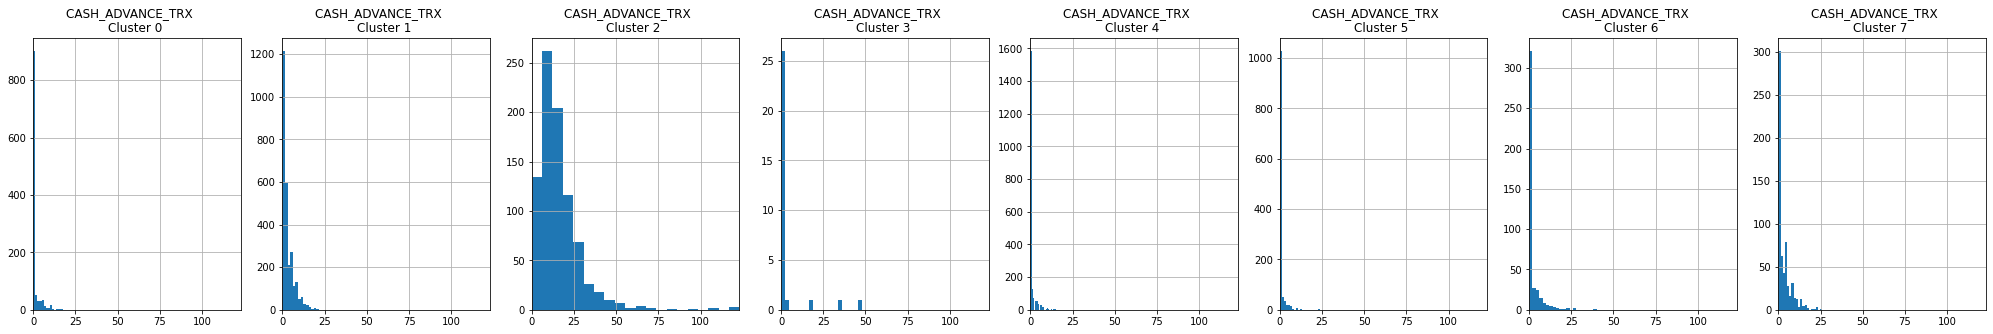

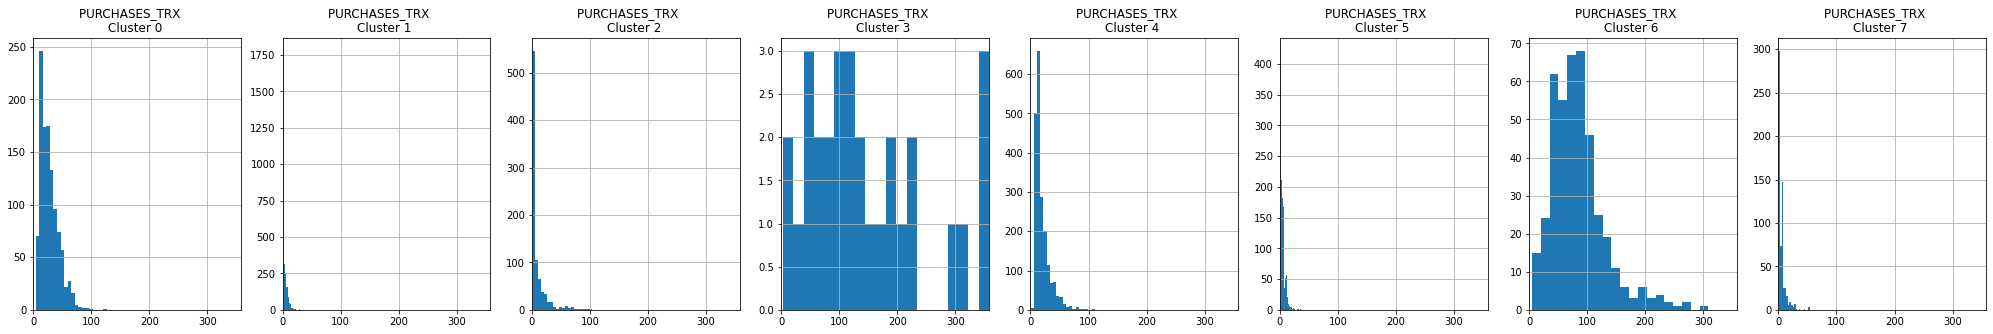

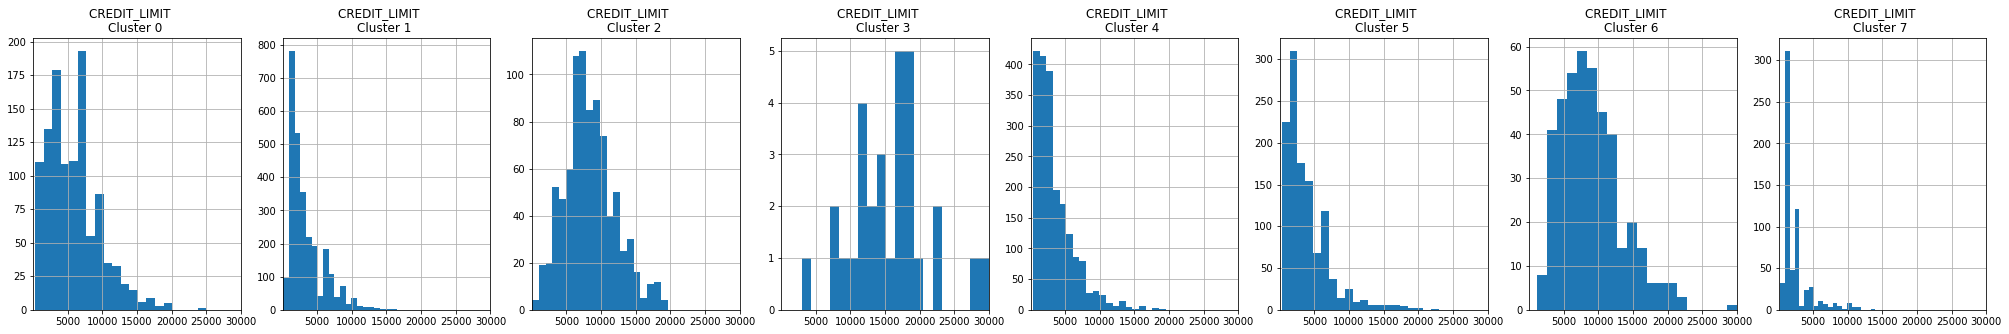

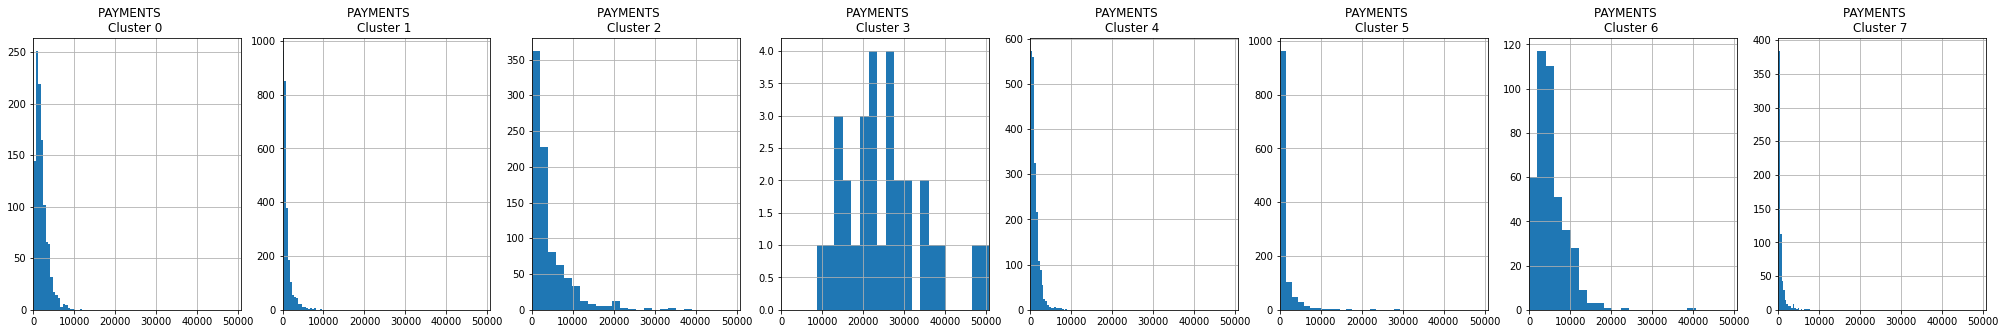

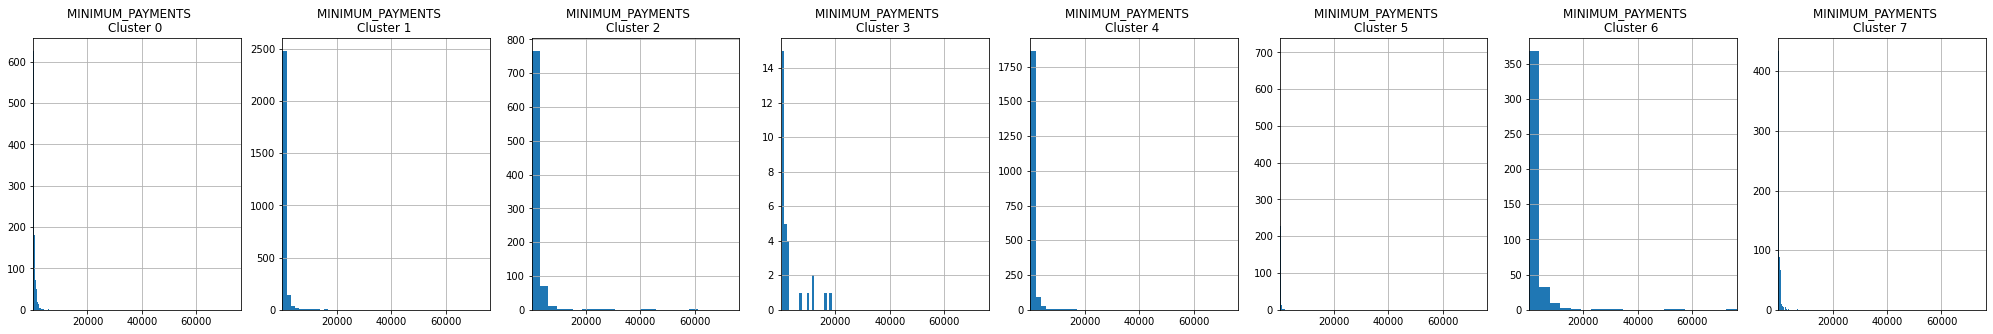

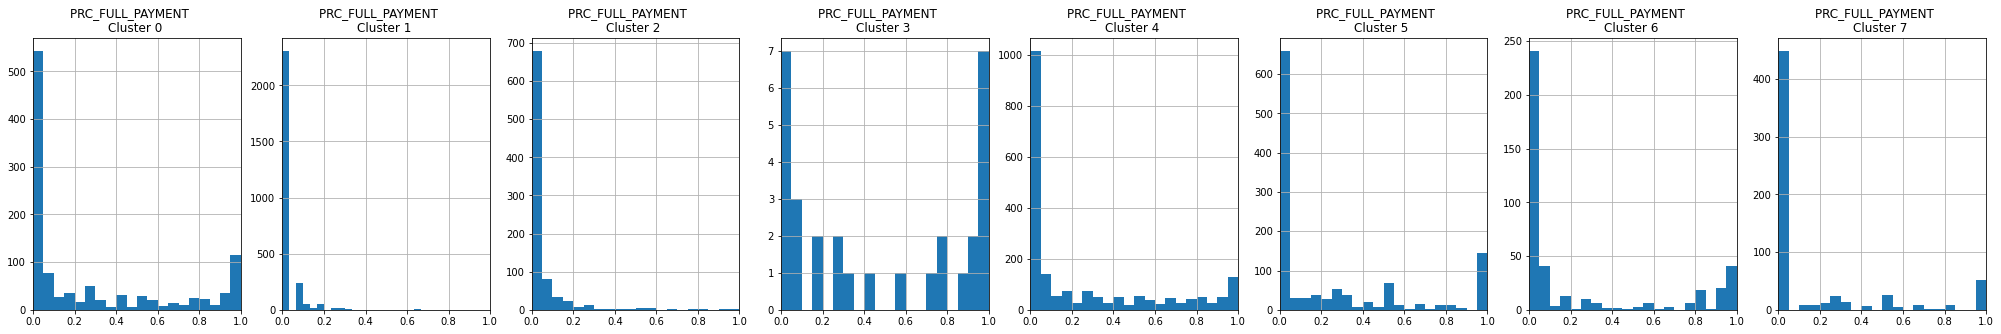

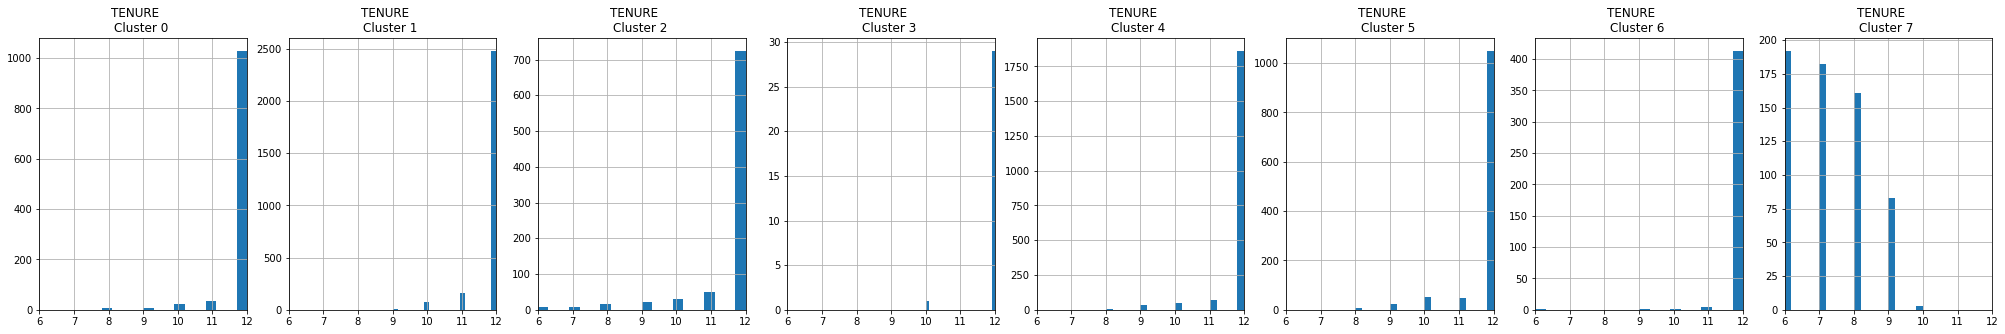

In [39]:
for i in df.columns[:-1]:
  plt.figure(figsize=(35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    muestra_cluster = df[df["CLUSTER"]==j]
    muestra_cluster[i].hist(bins=20)
    plt.xlim([df[i].min(), df[i].max()])
    plt.title("{}    \nCluster {} ".format(i, j))


# PASO 4: ANALISIS DE COMPONENTES PRINCIPALES

In [40]:
# Creamos el objeto PCA y reducimos a las 2 primeras componentes principales

pca = PCA(n_components=2)
main_comp = pca.fit_transform(scaled_df)
main_comp

array([[-1.68236287, -1.0767195 ],
       [-1.13897184,  2.50611162],
       [ 0.96938865, -0.38343415],
       ...,
       [-0.92578728, -1.81048946],
       [-2.33621447, -0.6577991 ],
       [-0.55603632, -0.40016428]])

In [41]:
pca_df = pd.DataFrame(main_comp, columns = ["PC1", "PC2"])
pca_df.head()

,PC1,PC2
0,-1.682363,-1.076719
1,-1.138972,2.506112
2,0.969389,-0.383434
3,-0.873819,0.042932
4,-1.599682,-0.688770


In [42]:
# Al data frame le concatenamos la columna de etiquetas de cada cluster 
pca_df = pd.concat([pca_df, pd.DataFrame({"CLUSTER": labels})], axis = 1)
pca_df.head()

,PC1,PC2,CLUSTER
0,-1.682363,-1.076719,1
1,-1.138972,2.506112,2
2,0.969389,-0.383434,0
3,-0.873819,0.042932,1
4,-1.599682,-0.688770,1


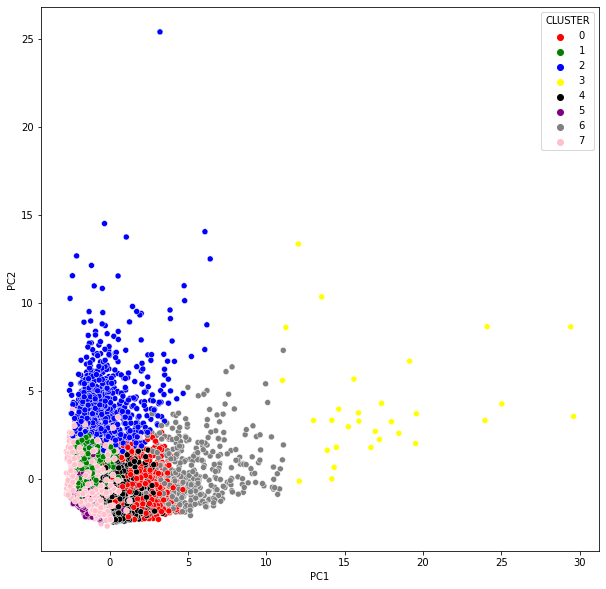

In [43]:
# Vamos a plotear la nube de puntos

plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x = "PC1", y = "PC2", hue = "CLUSTER", data = pca_df, palette=["red", "green", "blue", "yellow", "black", "purple", "gray", "pink"])
plt.show()


In [44]:
# Una manera de 
pca_df.groupby("CLUSTER").count()

,PC1,PC2
CLUSTER,,
0,1104,1104
1,2718,2718
2,861,861
3,30,30
4,2014,2014
5,1181,1181
6,420,420
7,621,621


# PASO 5: USO DE AUTOENCODERS PARA REDUCCIÓN DE DIMENSIONES

In [47]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [49]:
reduct_dim = 7

input_df = Input(shape=(17,))

x = Dense(reduct_dim, activation = "relu")(input_df)
x = Dense(500, activation = "relu", kernel_initializer = "glorot_uniform")(x)
x = Dense(500, activation = "relu", kernel_initializer = "glorot_uniform")(x)
x = Dense(2000, activation = "relu", kernel_initializer = "glorot_uniform")(x)

encoded = Dense(10, activation = "relu", kernel_initializer = "glorot_uniform")(x)

x = Dense(2000, activation = "relu", kernel_initializer = "glorot_uniform")(encoded)
x = Dense(500, activation = "relu", kernel_initializer = "glorot_uniform")(x)

decoded = Dense(17, kernel_initializer = "glorot_uniform")(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = "adam", loss = "mean_squared_error")

In [50]:
scaled_df.shape

(8949, 17)

In [51]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [ ]:
autoencoder.fit(scaled_df)